<a href="https://colab.research.google.com/github/kevinmcmanus/hclust/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Acknowledgement

This work draws heavily on [Summer School in Statistics for Astronomers XVI](https://sites.psu.edu/astrostatistics/su21-program/) and datasets and notebooks provided therein.

We will focus on just one aspect of [Clustering and Classifictaion](https://colab.research.google.com/drive/1P-kOudVcSDLLnk8ewBTGxlR3JHlSUHk8?usp=sharing), namely hierarchical clustering.
We will essentially do exercises 1, 2 and 3 from this notebook and render the results (if possible) in ggplot.

## Load Pre-reqs

As with Python in Google Colab, not all libraries are present when you start your session.
Analogous to !pip install some\_unusual\_library in R do install.packages("some\_unusual\_library") as follows:

In [40]:
#this might take a minute or two
install.packages('fpc')           # Flexible Procedures for Clustering
library(fpc)
install.packages("astrodatR")     # Data from Feigelson and Babu (2012)
library(astrodatR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [41]:
library(dplyr)
library(ggplot2)
install.packages("cowplot")
library(cowplot)
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## From our Last Episode...

In [42]:
data(COMBO17_lowz) # data from Feigleson, Babu 2012
COMBO_loz=COMBO17_lowz
str(COMBO_loz)
dim(COMBO_loz)
names(COMBO_loz)
#names(COMBO_loz) <- c('MB', 'M280-MB')  ; names(COMBO_loz)
names(COMBO_loz) <- c('MB', 'M280_MB')  ; names(COMBO_loz)

'data.frame':	572 obs. of  2 variables:
 $ M.B.       : num  -11.2 -14 -10.3 -13 -12.6 ...
 $ M.280..M.B.: num  -1.07 0.14 0.14 -0.1 -1.45 -1.01 -0.61 -0.42 -0.32 0.14 ...


[1] 572   2

[1] "M.B."        "M.280..M.B."

[1] "MB"      "M280_MB"

Warning message:
“Removed 6 rows containing missing values (geom_point).”


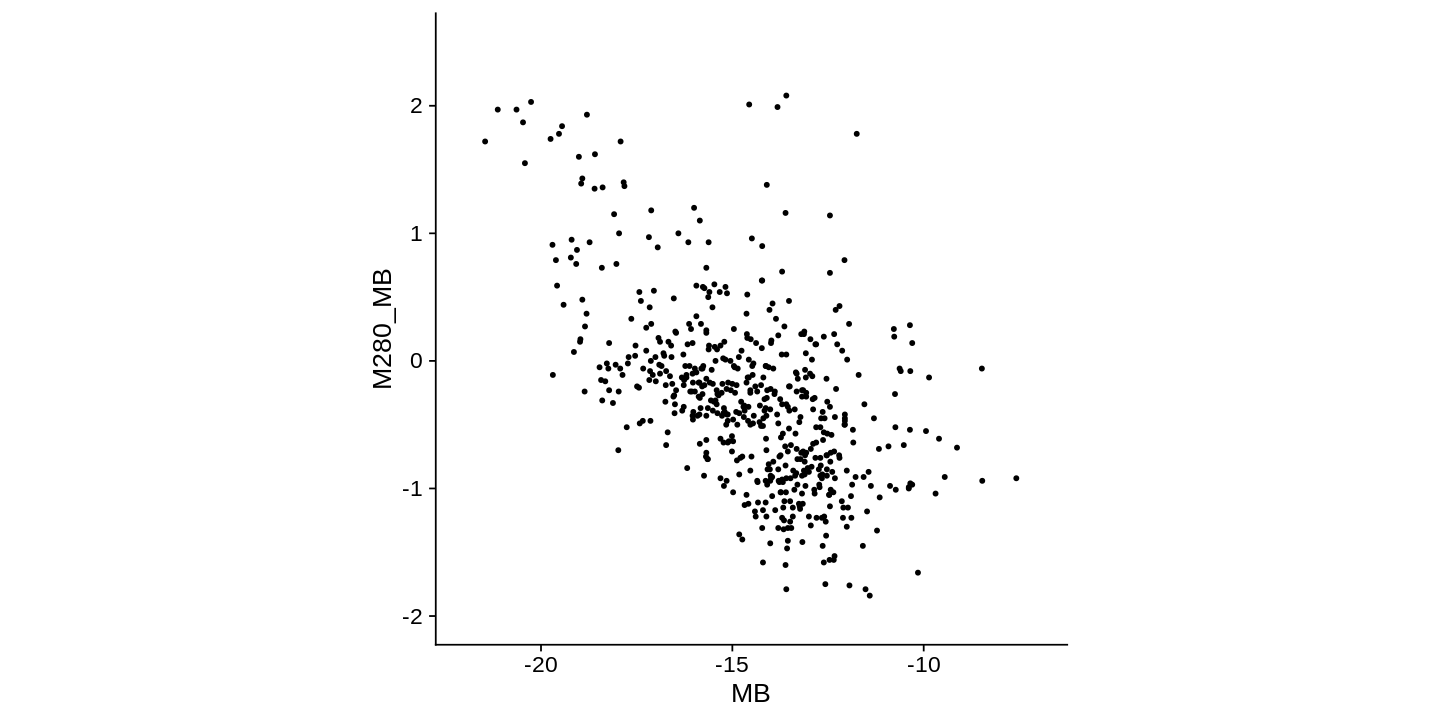

In [43]:
p <- ggplot(COMBO_loz, aes(x=MB, y=M280_MB))+
    geom_point(size=1) +
    xlim(-22,-7) + ylim(-2,2.5) +
    theme(aspect.ratio = 1)

p

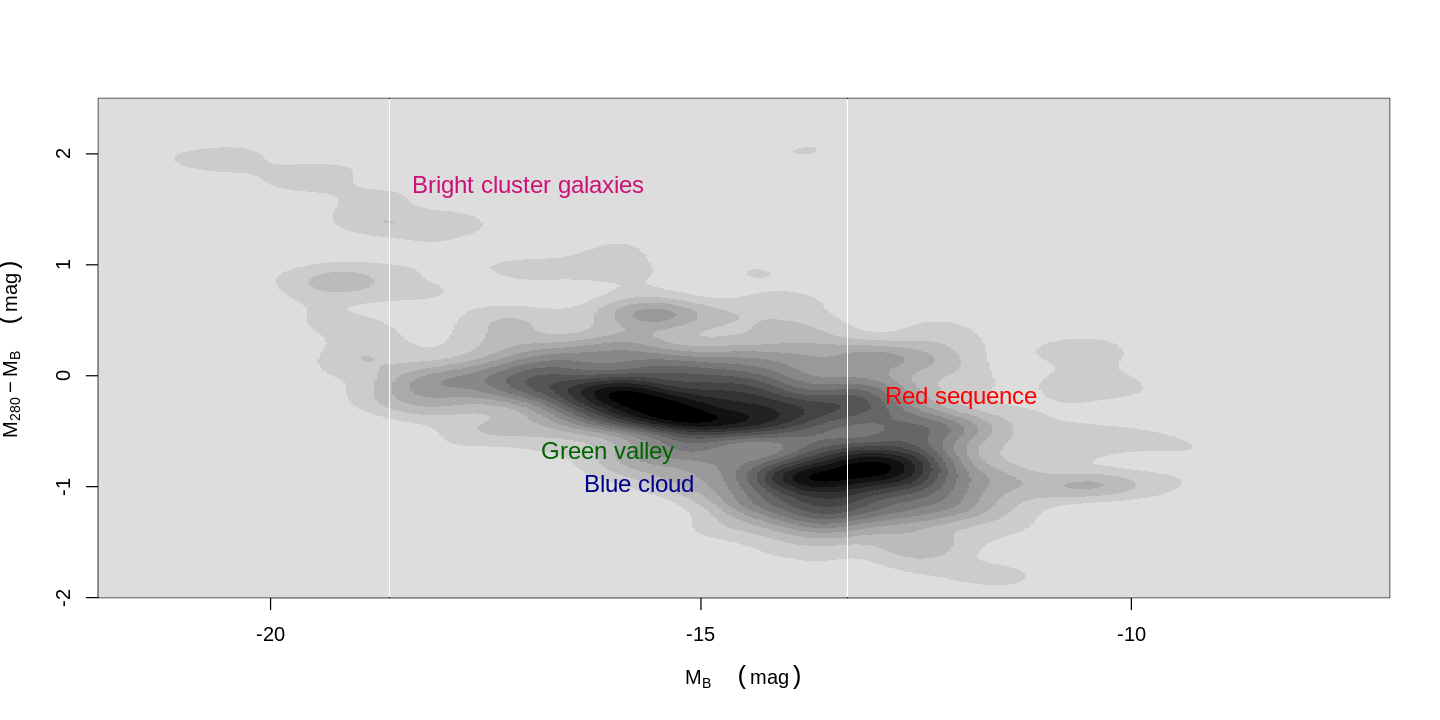

In [44]:
# Two-dimensional kernel-density estimator
# plot below from the author (subect matter expert who provided the labels)
library(MASS)
COMBO_loz_sm <- kde2d(COMBO_loz[,1], COMBO_loz[,2], h=c(1.6,0.4), 
   lims = c(-22,-7,-2,2.5), n=500)
image(COMBO_loz_sm, col=grey(13:0/15), xlab=expression(M[B]~~(mag)), 
   ylab=expression(M[280] - M[B]~~(mag)), xlim=c(-22,-7), ylim=c(-2,2.5), 
   xaxp=c(-20,-10,2))
text(-16.5, -1, "Blue cloud", col='darkblue', pos=4, cex=1.2)
text(-17,-0.7, 'Green valley', col='darkgreen', pos=4, cex=1.2)
text(-13, -0.2, 'Red sequence', col='red', pos=4, cex=1.2)
text(-18.5, 1.7, 'Bright cluster galaxies', col='deeppink3', pos=4, cex=1.2)

Warning message:
“Removed 6 rows containing non-finite values (stat_density2d).”


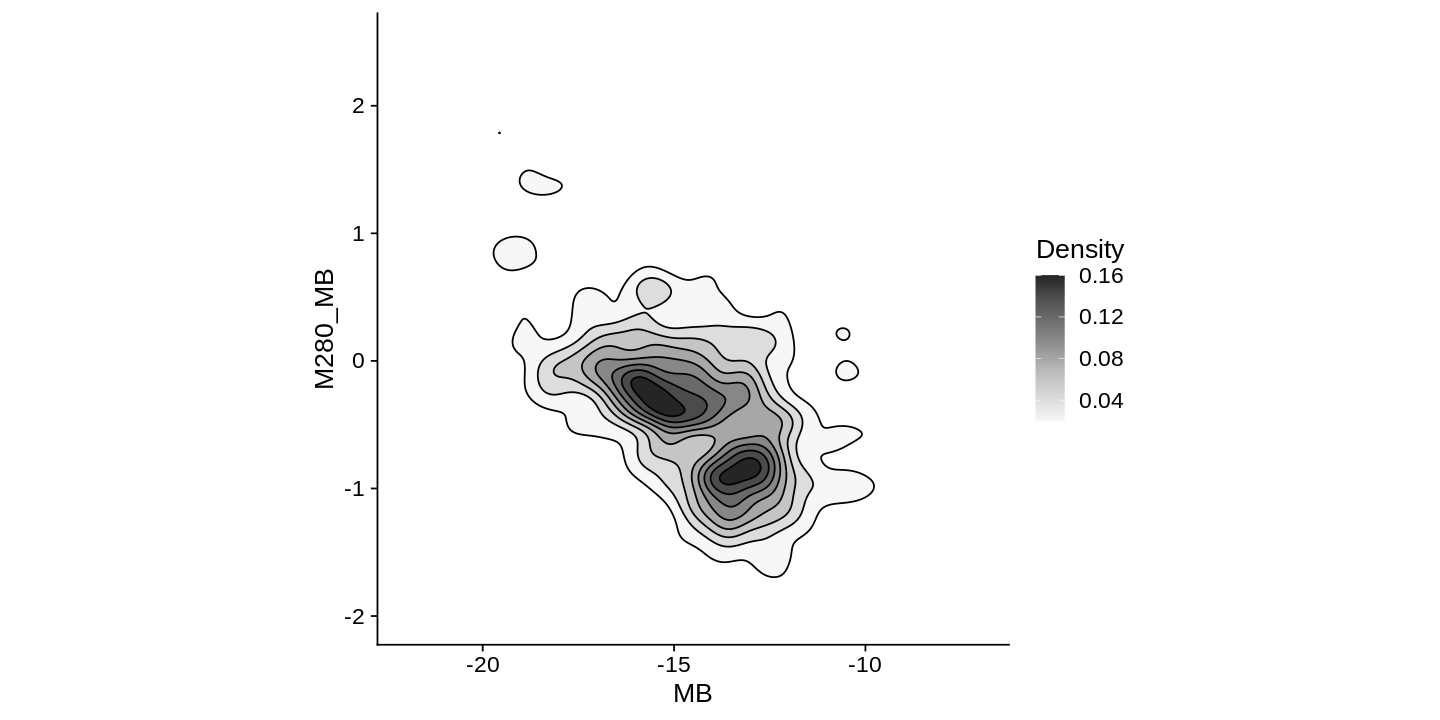

In [45]:
#do the above plot in ggplot
densplot <- COMBO_loz %>%
    ggplot(aes(x=MB, y=M280_MB))+
    stat_density_2d( geom = "density_2d_filled", contour = TRUE, n=500,h=c(1.6,0.4),
                  aes(fill = after_stat(level)), colour = "black") +
  scale_fill_distiller(palette = "Greys", direction = 1)+ 
    xlim(-22,-7) + ylim(-2,2.5)+
    labs(fill="Density")
densplot

Warning message:
“Removed 6 rows containing non-finite values (stat_density2d).”


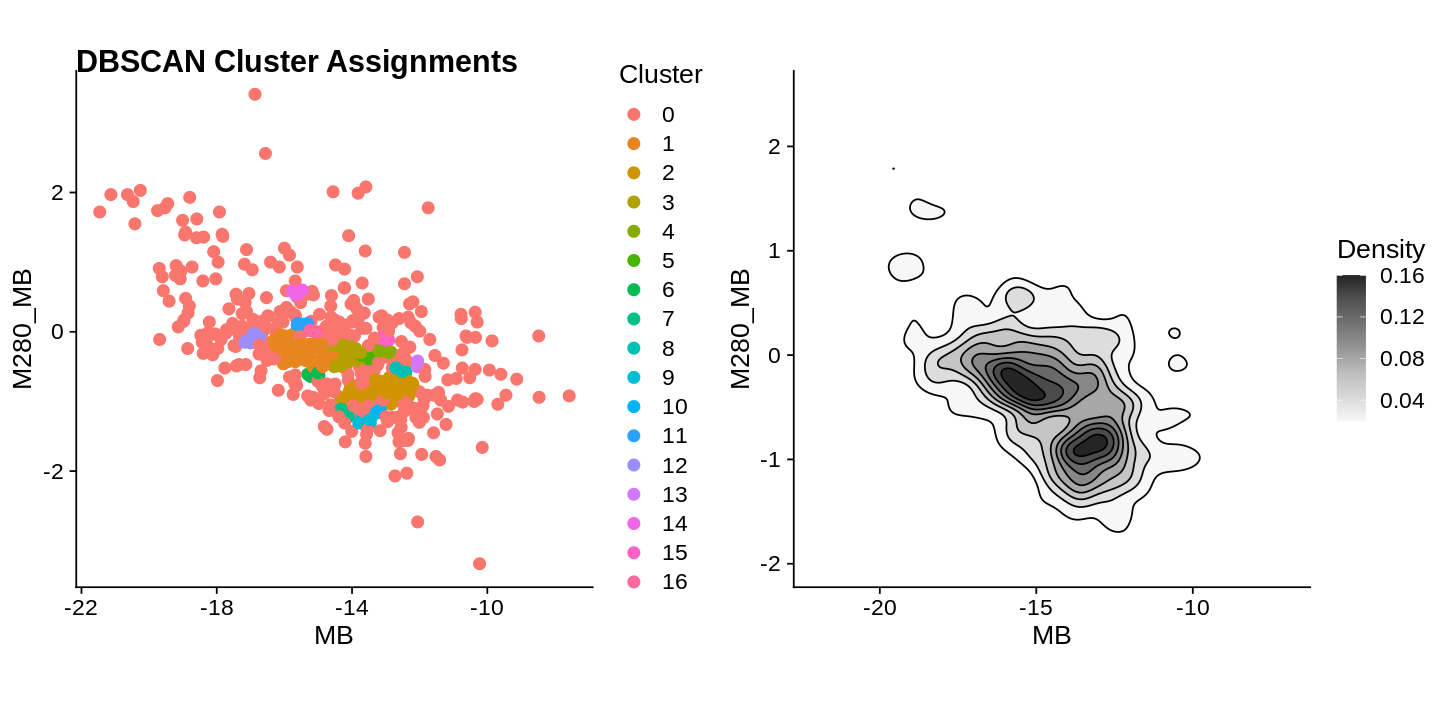

In [64]:
#set up some ggplot defaults
options(repr.plot.width=12, repr.plot.height=6)
oldtheme <- theme_set(theme_cowplot(font_size=16)+theme(aspect.ratio=1))

library(grid)
grid.draw(cbind(ggplotGrob(p), ggplotGrob(densplot), size = "last"))

## Standardize Data and Compute Distances

Last week, we showed that the `scale` function standardizes a variable represented as a vector.  We also showed that the `dist` function computes pairwise Euclidean (default) distance between pairs of rows in a dataframe. The result comes back as a lower triangular matrix.

It is this distance matrix that we'll use for our subsequent clustering explorations.

In [47]:
# Standardize variables and compute a Euclidean distance matrix

Mag_std <- scale(COMBO_loz[,1]) 
Color_std <- scale(COMBO_loz[,2])
COMBO_std <- cbind(Mag_std,Color_std)
COMBO_dist <- dist(COMBO_std)

## Density-Based Spatial Clustering with Noise (DBSCAN)

In [48]:
# Density-based clustering algorithm

# install.packages('fpc')
library(fpc)
COMBO_dbs <-  dbscan(COMBO_std, eps=0.1, MinPts=5, method='raw')
print.dbscan(COMBO_dbs) ; COMBO_dbs$cluster

dbscan Pts=572 MinPts=5 eps=0.1
         0  1  2  3 4 5 6 7 8 9 10 11 12 13 14 15 16
border 333 12 17 12 3 3 4 4 4 4  2  4  6  3  4  4  4
seed     0 59 46 16 6 2 2 1 1 4  4  1  2  2  1  1  1
total  333 71 63 28 9 5 6 5 5 8  6  5  8  5  5  5  5


[1]  0  0  0 15  0  0  6  1  1  0  0  2  0  2  0  3  4  2  3  0  0  1  0  0  0
 [26]  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  1  5  0  0  0  2  8  6  2  0
 [51]  7  0  8  0  0  0  0 14  0  0  9  0  3  0  0  1  1  1  0  0  0  1  0  0  3
 [76]  1  0  0 12  2  6  2  0  0  0  7  0  0 16  0  0  1  1  0  0  0  0  0  2  1
[101]  3 10  4  2  2  0  0  0  1  0  0  7  9  2  0  0  3  3  0  0  1  2  0  0  1
[126]  0  0  7  0  9  0  0  0  1  1  0  0 15 11  0 12  0  0  1  0  5  0  0  0  0
[151]  0  0  2  2 13  2 16 10  2  0  0  0  0  1  0  0  0  0  0  2  0  0  3  0 16
[176]  2  0  2  0  1  0  0  0  1  1  3  2  0  0  4  0  0  2  0  0  0  2  2  0  0
[201]  0  0 15  0  1  0  0  0  0 14  0 13  9  2  2  0  0  0  1  0  8  0  0  2  0
[226]  0  5  1  0  0  0  0  0  0 12  0  2  0  0  0  2  1  0  0  3  2  0  3  2  0
[251]  1  1  3  0  0  2  1  0  2 10  0  0  0 12  0  1  9  2  0  0  2  0  0  0  0
[276]  2  0  2  2  0  3  0  0  0  0  0  1  0  2  0  0  3  0  1  0  0  0  0  0  0
[301]  0  2  0  0 13  4  1  0  3  0  0  2 11  0  0  0  1  4  1  0  0  0  2  0  5
[326]  2  5  4  2  0  0  0  3  1  2 11 10  0  0 11  1 14  0  6  3  0  2  3  0  0
[351] 15  0  0  0  2  0  1  3  0  2  0  1  0  1  0  1  4  0  3  9  0  0  0  9  0
[376]  0  2  1  6  2  0  0  1  0  0  0  0  0 12  0  7  0  0  0  1  1  0  0  1  2
[401]  1  9  0  1  0  0  0  3  1  1  1  0  0  0  0  0  1  0  0  3  0 13  0  0  0
[426]  0  0  0  1  0  0  0  3 10  0  0  2  0  3  0  0  0 10  1  1  0  0  1  0  2
[451]  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  2  0  1 16 14  0  0  1  0  0
[476]  0  2  0  0  1  1  2 12  0  0  1  0  0  0  0  0 15  0  3  4  0  0  0  0  1
[501]  0  3  0  0  0  0  0 13  0  0  0  0  2  0  0  1  0  0  2  0  0  0 12  0  2
[526]  0  1  4  0  2  0  0  1  2 11  6  0  1 14  0  0  0  0  3  0 16  0  0  0  2
[551]  0  0  0  1  0  0  1  0  0  0  0  3  0  8  0  1  8  0  2  2  0  0

`dbscan` identified 16 clusters in addition to a background or noise cluster (cluster #0), cluster assignments shown above. `eps` parameter is shorthand for epsilon - which is the granularity of the kernel density function fitted over the data.

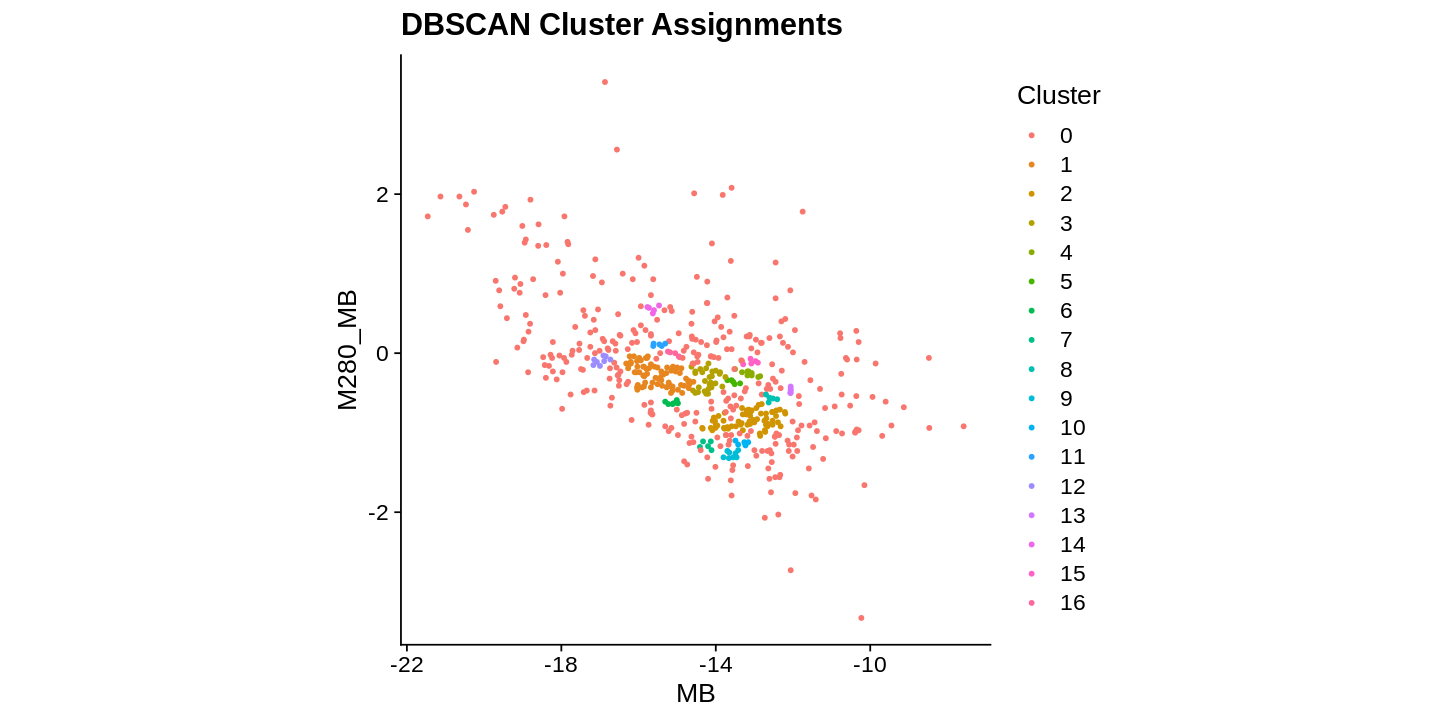

In [73]:
# what cluster assignments did we get?
p <- ggplot(data = COMBO_loz, aes(x=MB, y=M280_MB, color=as.factor(COMBO_dbs$cluster) ))+
    geom_point(size=1)+labs(title='DBSCAN Cluster Assignments', color='Cluster')
p




In [50]:
# ditch the background and low population clusters
member_counts <- data.frame(Cluster=as.factor(COMBO_dbs$cluster)) %>%
  group_by(Cluster) %>% summarise(Count=n())

small_pop = member_counts$Cluster[member_counts$Count < 8]

small_pop

[1] 5  6  7  8  10 11 13 14 15 16
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16

In [51]:
member_counts[-as.integer(small_pop),]

Cluster,Count
<fct>,<int>
0,333
1,71
2,63
3,28
4,9
9,8
12,8


In [59]:
#fix up the cluster membership
big_clusters = member_counts[-as.integer(small_pop),]$Cluster
#map the small pop clusters to 0 (background) which we'll later exclude
cluster_id = ifelse(COMBO_dbs$cluster %in% big_clusters, COMBO_dbs$cluster,0)

Warning message:
“Removed 6 rows containing non-finite values (stat_density2d).”


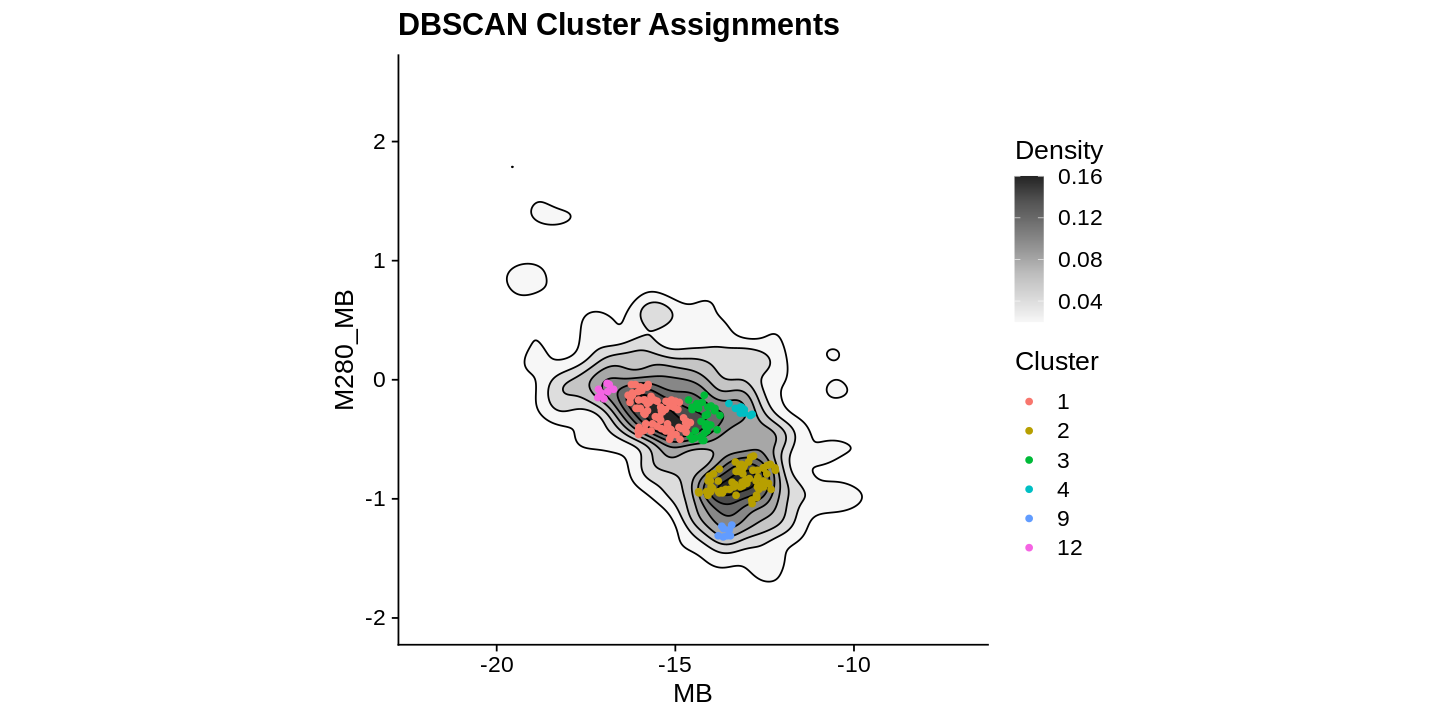

In [72]:

q <- COMBO_loz %>% mutate(cluster_id=cluster_id)%>%
  filter(cluster_id > 0)


densplot+  geom_point(data=q, aes(x=MB, y=M280_MB, color=as.factor(cluster_id) ))+
    labs(title='DBSCAN Cluster Assignments', color='Cluster')


Warning message:
“Removed 6 rows containing non-finite values (stat_density2d).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


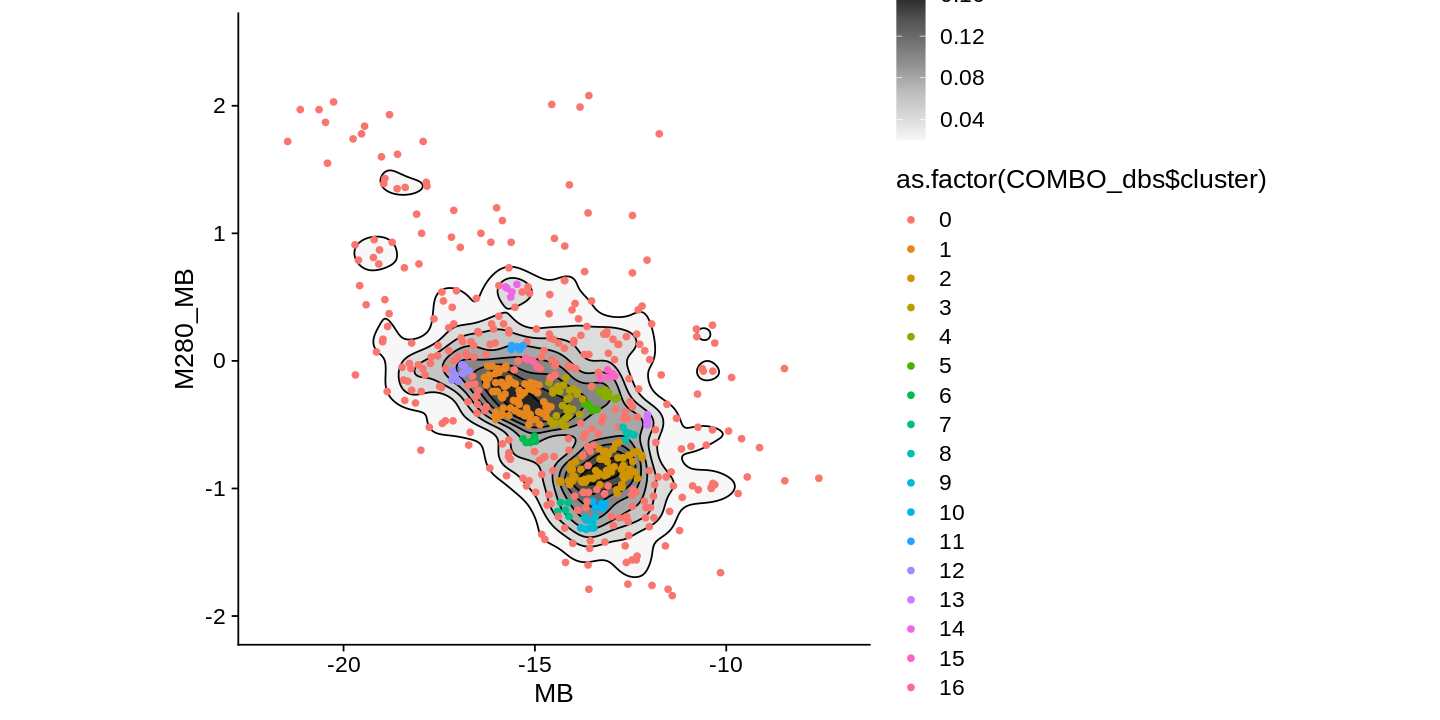

In [52]:
q <- densplot +
    geom_point(data = COMBO_loz, aes(x=MB, y=M280_MB, color=as.factor(COMBO_dbs$cluster) ))
q

In [74]:
#different eps values
eps_val = c(0.08, 0.10, 0.12, 0.14,0.16, 0.18)
eps_scans = list()
COMBO_loz_dbscan = COMBO_loz[c('MB','M280_MB')]
for (e in eps_val){
    eps_str <-  paste("eps value:",e)
    eps_scans[[eps_str]] <-  dbscan(COMBO_std, eps=e, MinPts=8, method='raw')
    COMBO_loz_dbscan[eps_str] <- eps_scans[[eps_str]]$cluster
}

In [75]:
eps_scans_df <- COMBO_loz_dbscan %>% gather(key="eps", value="Member.id", paste("eps value:",eps_val))

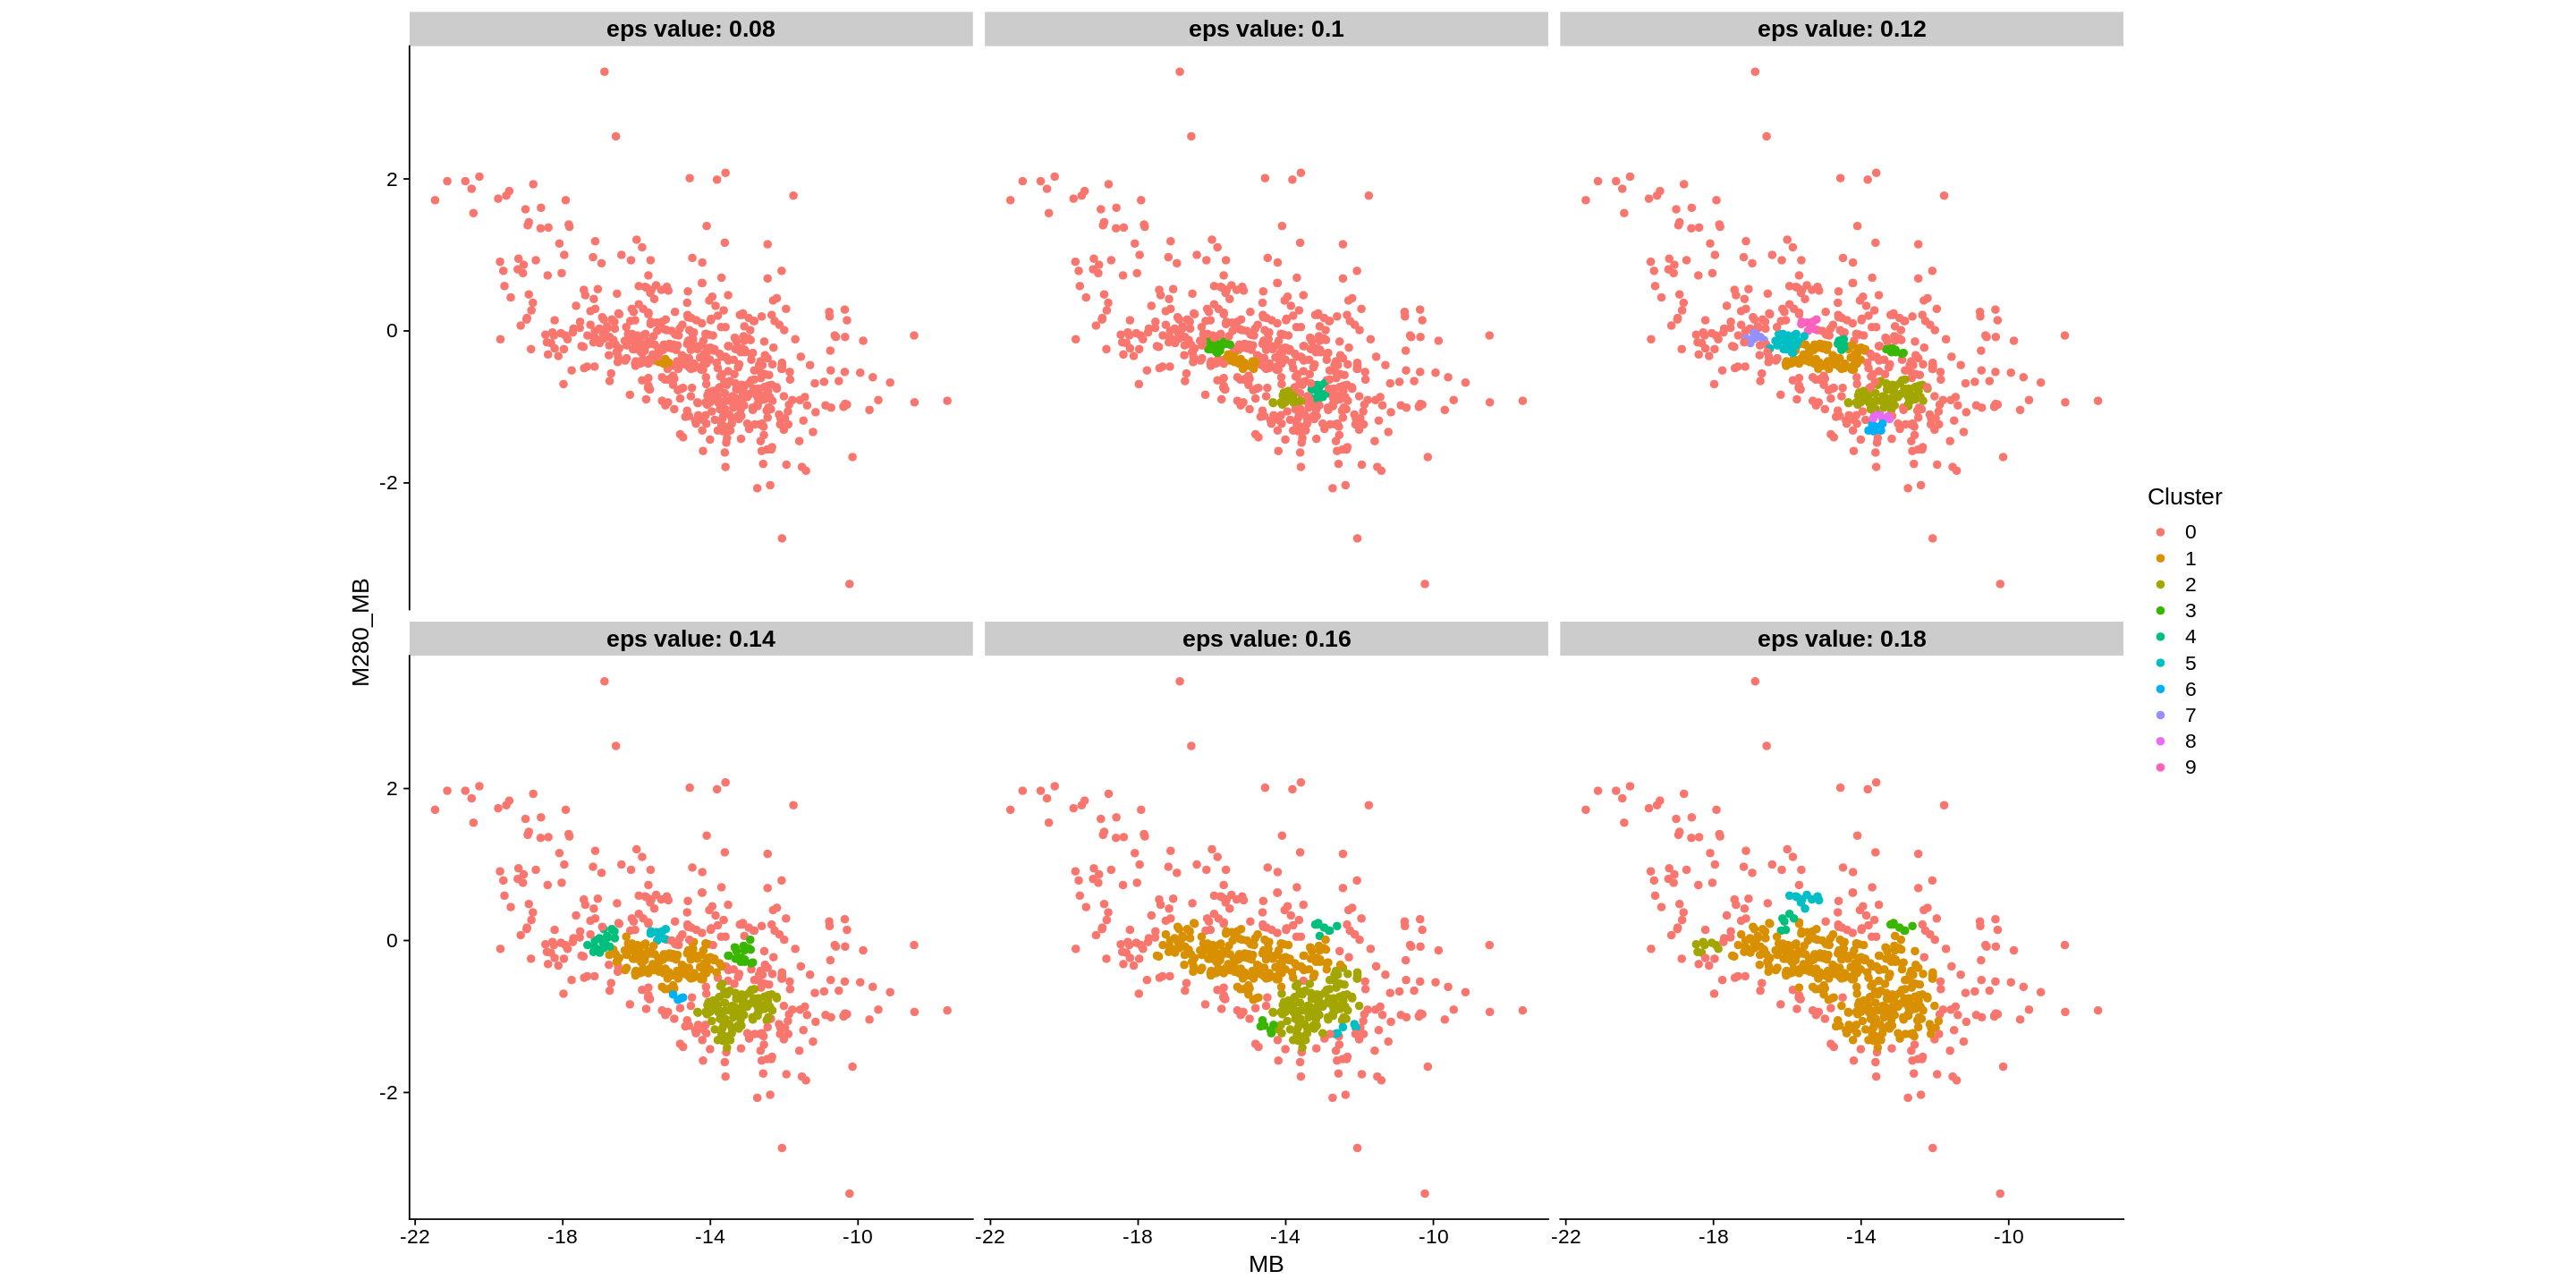

In [76]:
options(repr.plot.width=24, repr.plot.height=12)
#COMBO_loz_p +
ggplot() +
    geom_point(data=eps_scans_df,aes(x=MB, y=M280_MB, color=as.factor(Member.id)), size=2)+
    labs(color='Cluster') +
    facet_wrap(~ eps) +
    theme(strip.text.x = element_text(size=16, face="bold"))

Warning message:
“Removed 36 rows containing non-finite values (stat_density2d).”
Warning message:
“Removed 36 rows containing missing values (geom_point).”


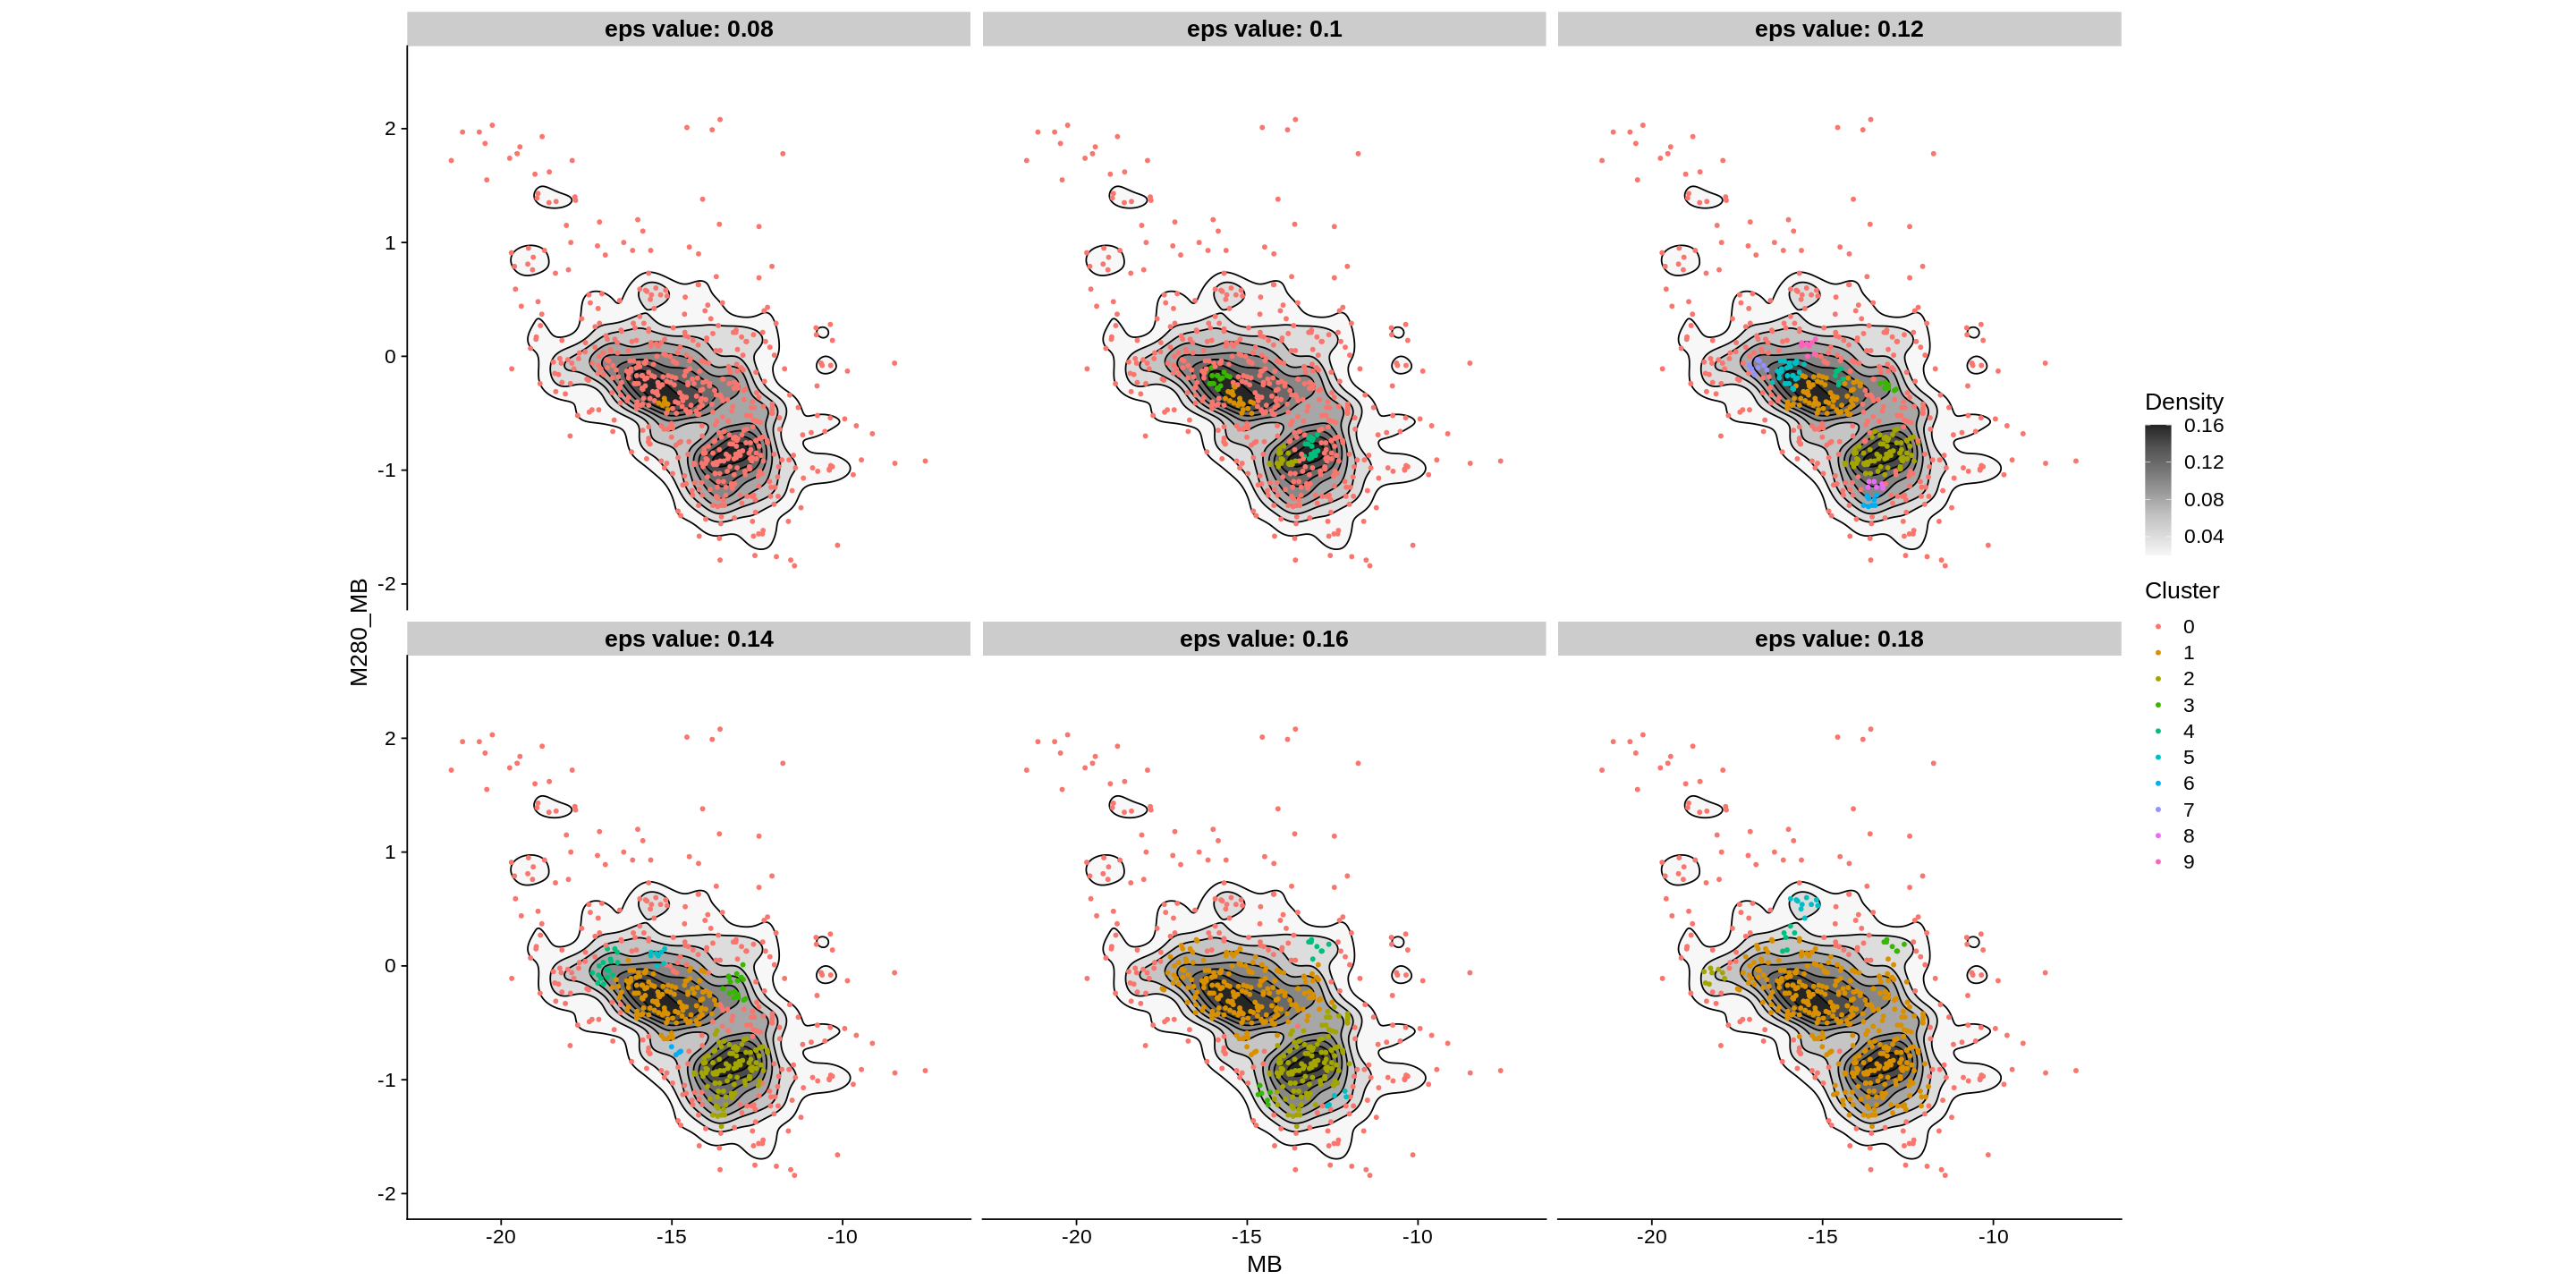

In [79]:
options(repr.plot.width=24, repr.plot.height=12)
densplot +
#ggplot() +
    geom_point(data=eps_scans_df,aes(x=MB, y=M280_MB, color=as.factor(Member.id)), size=1)+
    labs(color='Cluster') +
    facet_wrap(~ eps) +
    theme(strip.text.x = element_text(size=16, face="bold"))

Warning message:
“Removed 6 rows containing non-finite values (stat_density2d).”


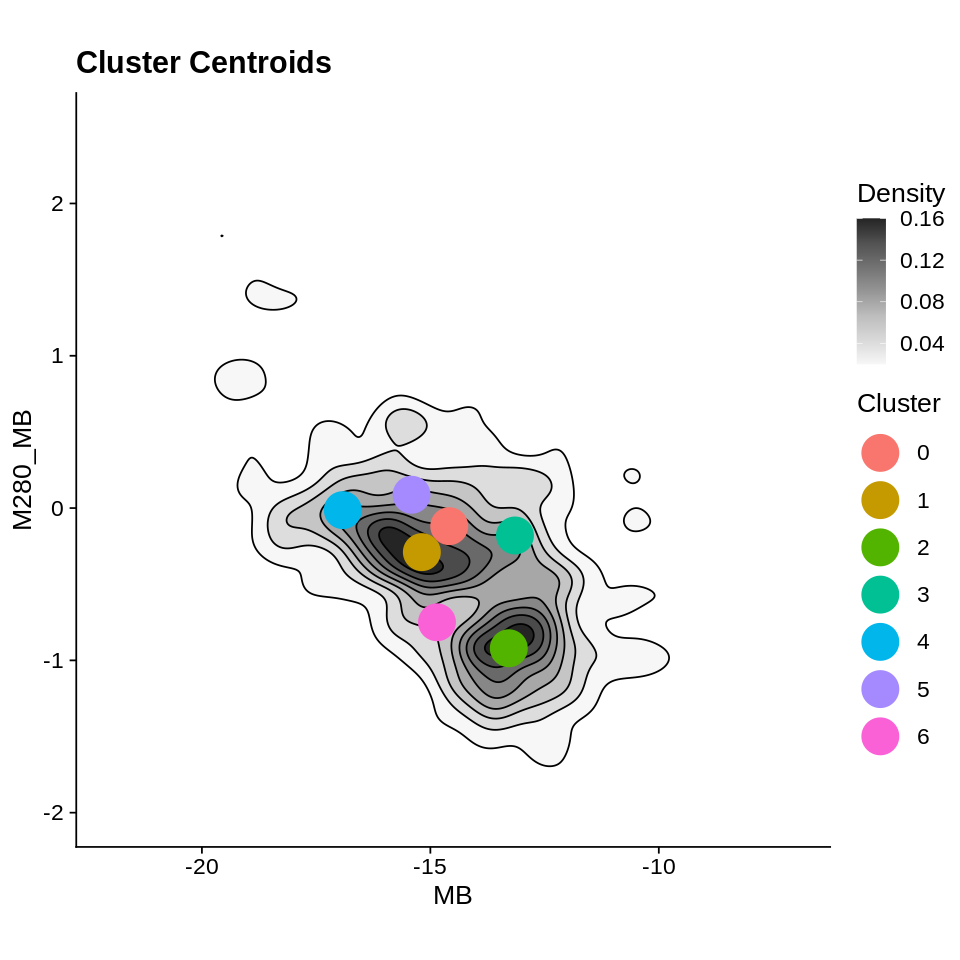

In [82]:
#clusters014 = eps_scans$`eps value: 0.14`$cluster
#clusters014
means_014 <- COMBO_loz_dbscan %>%
    dplyr::select(MB, M280_MB, `eps value: 0.14`) %>%
    mutate(cluster = as.factor(`eps value: 0.14`)) %>%
    group_by(cluster) %>%
    summarize(MB=mean(MB), M280_MB=mean(M280_MB))

options(repr.plot.width=8, repr.plot.height=8)
densplot +
    geom_point(data=means_014,aes(x=MB, y=M280_MB, color=cluster), size=10)+
    labs(color='Cluster', title='Cluster Centroids')


Warning message:
“Use of `COMBO_loz_dbscan$`eps value: 0.14`` is discouraged. Use `eps value: 0.14` instead.”
Warning message:
“Removed 6 rows containing non-finite values (stat_density2d).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


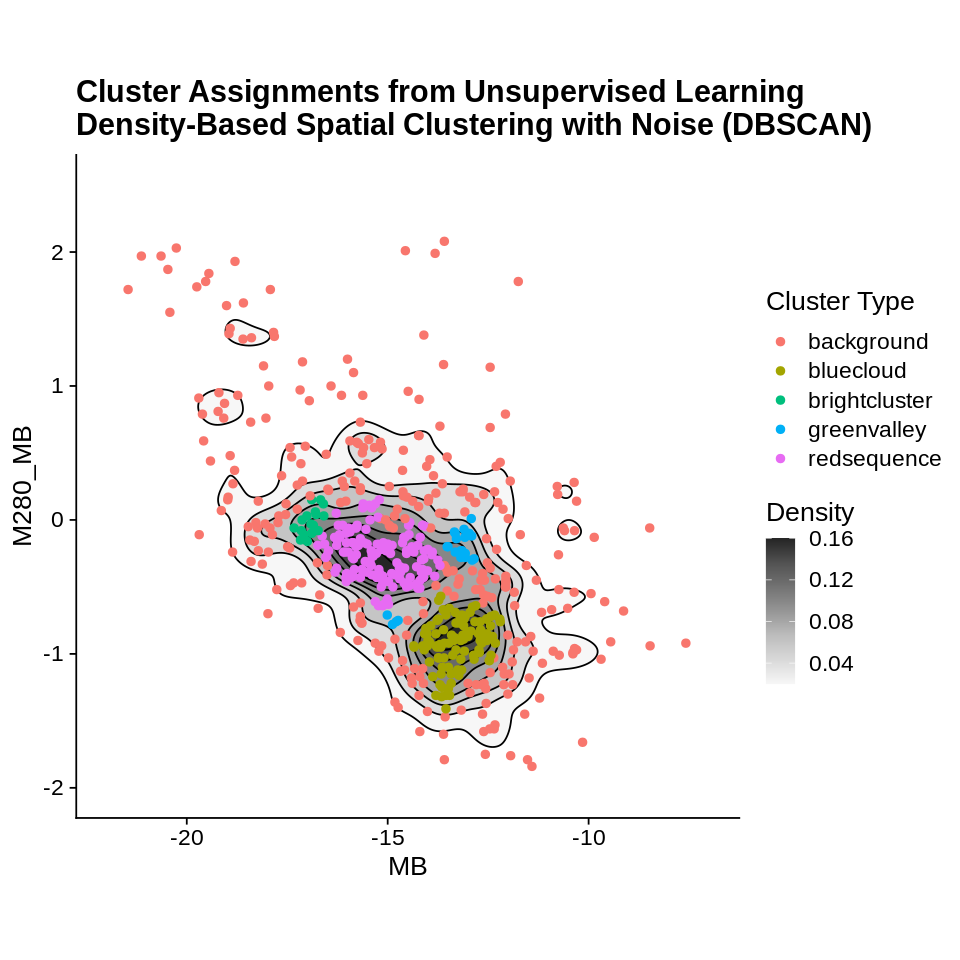

In [122]:
#consolodate the clusters
#text(-16.5, -1, "Blue cloud", col='darkblue', pos=4, cex=1.4, font=2)
#text(-17,-0.7, 'Green valley', col='darkgreen', pos=4, cex=1.4, font=2)
#text(-13, -0.2, 'Red sequence', col='red', pos=4, cex=1.4, font=2)
#text(-18.5, 1.7, 'Bright cluster galaxies',

cluster_mapper = c('background', 'redsequence', 'bluecloud', 'greenvalley','brightcluster','redsequence','greenvalley')
options(repr.plot.width=8, repr.plot.height=8)
p <- densplot +
    geom_point(data=COMBO_loz_dbscan,aes(x=MB, y=M280_MB,
                                  color=as.factor(cluster_mapper[as.integer(COMBO_loz_dbscan$`eps value: 0.14`)+1])), size=2)+
    labs(color="Cluster Type", title='Cluster Assignments from Unsupervised Learning\nDensity-Based Spatial Clustering with Noise (DBSCAN)' )
p

In [115]:
text_df <- data.frame(rbind(c(-16.5, -1, "Blue cloud", color='blue'),
            c(-17,-0.7, 'Green valley', color='green'),
            c(-13, -0.2, 'Red sequence', color='red'),
            c(-18.5, 1.7, 'Bright cluster galaxies', color='orange')))
names(text_df) <- c("MB","M280_MB","Name","Color")
text_df$MB = as.numeric(text_df$MB)
text_df$M280_MB = as.numeric(text_df$M280_MB)

In [116]:
text_df

MB,M280_MB,Name,Color
<dbl>,<dbl>,<chr>,<chr>
-16.5,-1.0,Blue cloud,blue
-17.0,-0.7,Green valley,green
-13.0,-0.2,Red sequence,red
-18.5,1.7,Bright cluster galaxies,orange


Warning message:
“Removed 6 rows containing non-finite values (stat_density2d).”
Warning message:
“Use of `COMBO_loz_dbscan$`eps value: 0.14`` is discouraged. Use `eps value: 0.14` instead.”
Warning message:
“Removed 6 rows containing non-finite values (stat_density2d).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


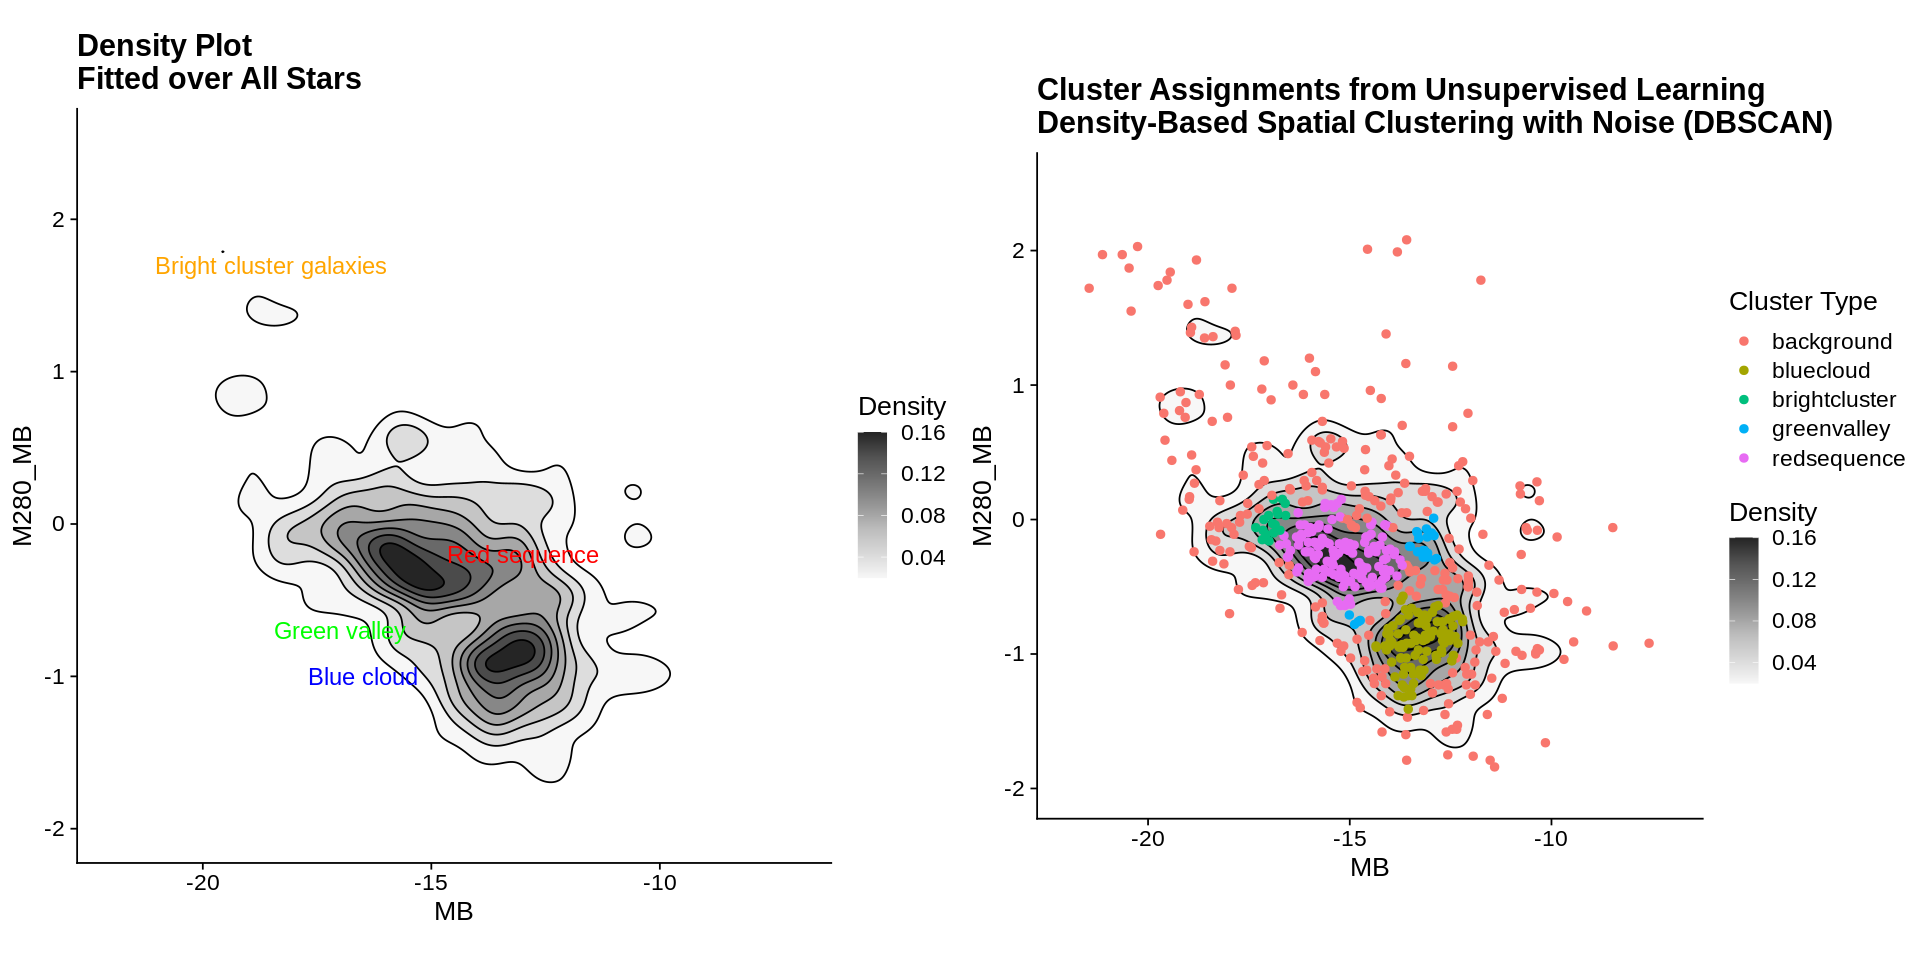

In [127]:
options(repr.plot.width=16, repr.plot.height=8)
cowplot::plot_grid(densplot +
geom_text(data=text_df, aes(label=Name) , color=text_df$Color, size=5)+labs(title='Density Plot\nFitted over All Stars'), p)
